In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re 
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_score, recall_score, classification_report, accuracy_score, f1_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [2]:
data = pd.read_csv("spam.csv",encoding='latin1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
drp=["Unnamed: 2",'Unnamed: 3','Unnamed: 4']
data = data.drop(data[drp],axis=1)
data.rename(columns= { "v1" : "Target","v2" : "Text"} , inplace=True)
data.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


C:\Users\Nikhil\AppData\Local\Temp\ipykernel_19920\1683790035.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fig= sns.countplot(x=data["Target"],palette= col)


Text(0, 0.5, 'Data Points')

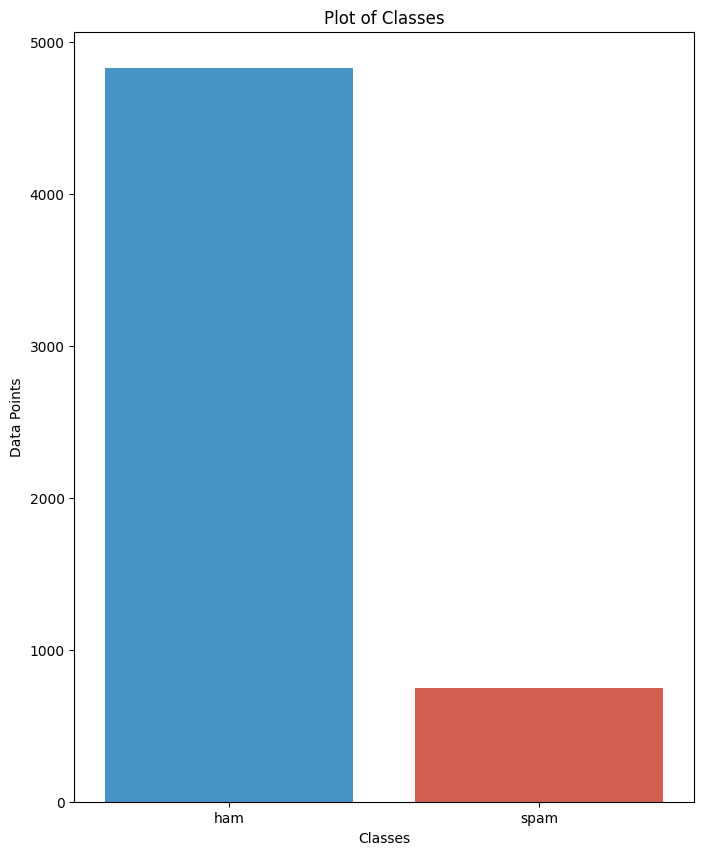

In [5]:
col=['#3498db','#e74c3c']
plt.figure(figsize=(8,10))
fig= sns.countplot(x=data["Target"],palette= col)
fig.set_title("Plot of Classes")
fig.set_xlabel("Classes")
fig.set_ylabel("Data Points")

In [6]:
data ["No_of_Characters"] = data["Text"].apply(len)
data ["No_of_Words"] = data.apply(lambda row: nltk.word_tokenize(row["Text"]),axis=1).apply(len)
data["No_of_sentence"]=data.apply(lambda row: nltk.sent_tokenize(row["Text"]), axis=1).apply(len)
data.describe()

,No_of_Characters,No_of_Words,No_of_sentence
count,5572.000000,5572.000000,5572.000000
mean,80.118808,18.699390,1.996411
std,59.690841,13.741932,1.520159
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.500000
75%,121.000000,27.000000,2.000000
max,910.000000,220.000000,38.000000


<Figure size 800x1000 with 0 Axes>

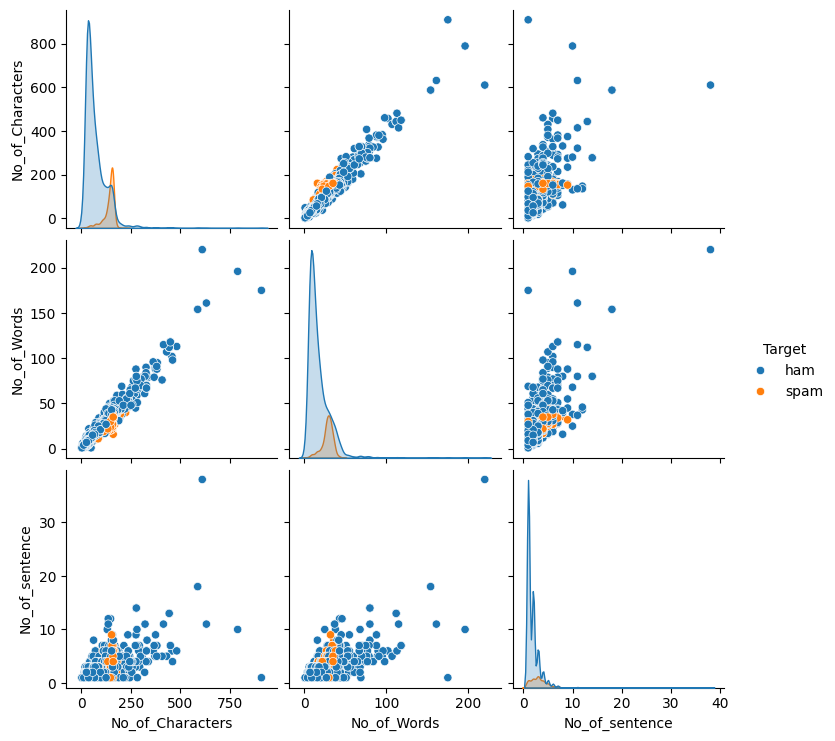

In [7]:
plt.figure(figsize=(8,10))
fig= sns.pairplot(data=data,hue="Target")
plt.show(fig)


In [8]:
data = data[(data["No_of_Characters"]<350)]
data.shape

(5548, 5)

<Figure size 800x1000 with 0 Axes>

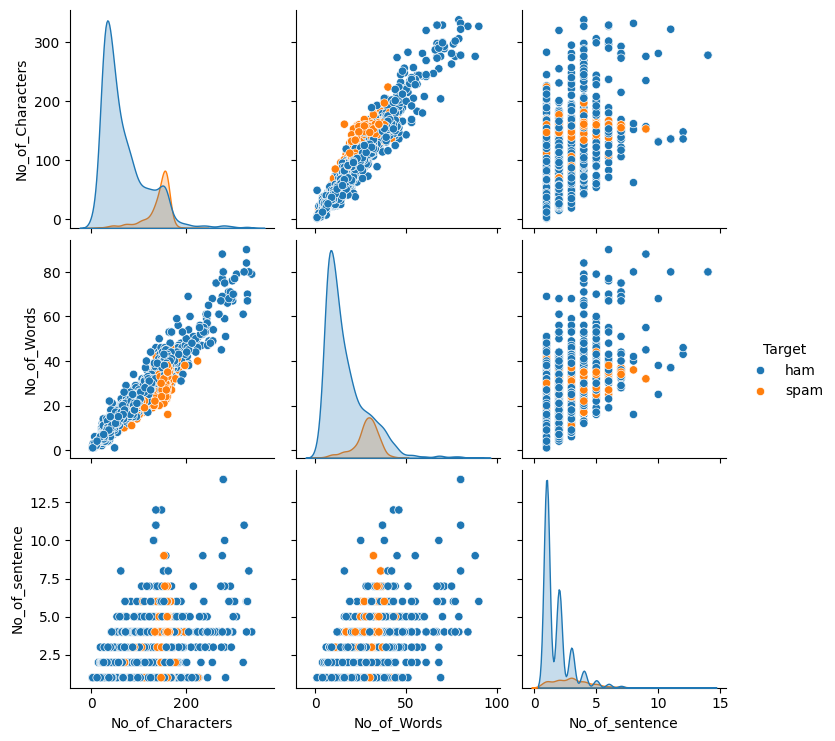

In [9]:
plt.figure(figsize=(8,10))
fig= sns.pairplot(data=data,hue="Target")
plt.show(fig)

<function matplotlib.pyplot.show(close=None, block=None)>

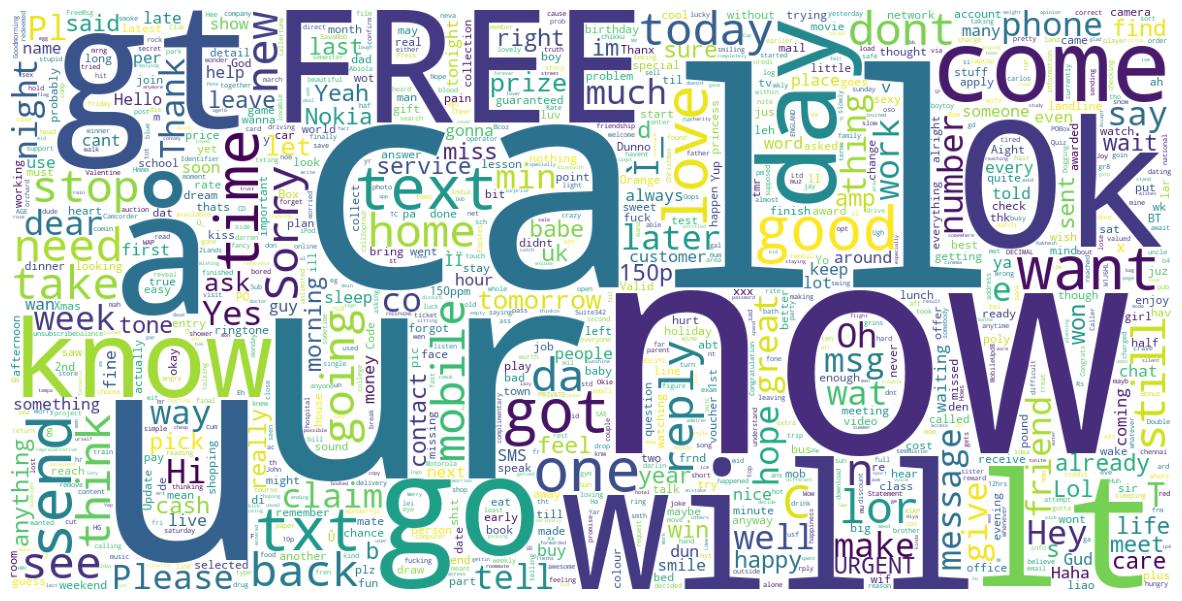

In [10]:
from wordcloud import WordCloud

text= " ".join(i for i in data.Text)
wc=WordCloud(background_color="white",width=1200,height=600,contour_width=0,contour_color="#8bd108",max_words=1000,scale=1,collocations=False,repeat=True,min_font_size=1)
wc.generate(text)

plt.figure(figsize=[15,8])
plt.imshow(wc)
plt.axis('off')
plt.show

In [11]:
print(f"First Text in Dataset is : \n {data.Text[0]}")

First Text in Dataset is : 
 Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


In [12]:
def Clean(Text):
    sms=re.sub('[^a-zA-Z]',' ' ,Text)
    sms = sms.lower()
    sms = sms.split()
    sms = ' '.join(sms)
    return sms

data["Clean_Text"] = data["Text"].apply(Clean)
print(f"First Text After Cleanining in Dataset is : \n {data.Clean_Text[0]}")

First Text After Cleanining in Dataset is : 
 go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat


In [13]:
data["Tokenized"]=data.apply(lambda row:nltk.word_tokenize(row["Clean_Text"]),axis=1)
print(f"First Text After Tokenized in Dataset is : \n {data.Tokenized[0]}")

First Text After Tokenized in Dataset is : 
 ['go', 'until', 'jurong', 'point', 'crazy', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'there', 'got', 'amore', 'wat']


In [14]:
def remove_stopwords(text):
    stop_words=set(stopwords.words("english"))
    filtered_text=[word for word in text if word not in stop_words]
    return filtered_text

data["NonStopWords_Text"]=data["Tokenized"].apply(remove_stopwords)
print(f"First Text After removing StopWords is : \n {data.NonStopWords_Text[0]}")


First Text After removing StopWords is : 
 ['go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amore', 'wat']


In [15]:
lemmate=WordNetLemmatizer()

def lemmatize_Word(text):
    lemmas= [lemmate.lemmatize(word,pos='v') for word in text]
    return lemmas
data["Lemmatized"]=data["NonStopWords_Text"].apply(lemmatize_Word)
print(f"First Text After Lemmatization is : \n {data.Lemmatized[0]}")

First Text After Lemmatization is : 
 ['go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'get', 'amore', 'wat']


In [16]:
corpus= []
for i in data["Lemmatized"]:
    msg=' '.join([row for row in i])
    corpus.append(msg)

corpus[:3]
print(f"The First 3 lines in corpus: \n {corpus[:3]}",sep= "\n")

The First 3 lines in corpus: 
 ['go jurong point crazy available bugis n great world la e buffet cine get amore wat', 'ok lar joke wif u oni', 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply']


In [17]:
tfidf=TfidfVectorizer()
X= tfidf.fit_transform(corpus).toarray()
X.dtype

dtype('float64')

In [18]:
label=LabelEncoder()
data["Target"]=label.fit_transform(data["Target"])

In [19]:
y=data["Target"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [20]:
clf=MultinomialNB()
clf.fit(X_train,y_train)

MultinomialNB()

In [21]:
cv_score=cross_val_score(clf,X_train,y_train,scoring="accuracy",cv=10)
print(f"CV score is {cv_score.mean()}")

CV score is 0.9675518068858926


In [22]:
pred=clf.score(X_test,y_test)
print(pred)

0.963963963963964


In [23]:
train_accuracy = clf.score(X_train,y_train)
test_accuracy = clf.score(X_test,y_test)
print(test_accuracy,train_accuracy)

0.963963963963964 0.9763406940063092


In [24]:
y_p=clf.predict(X_test)
accuracy=accuracy_score(y_test,y_p)
print(accuracy)

0.963963963963964


In [25]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)


RandomForestClassifier()

In [26]:
cv_scores = cross_val_score(rf, X_train,y_train,scoring="accuracy", cv=10)
print(f"CV score is {cv_scores.mean()}")

CV score is 0.9763396579423667


In [27]:
pre=rf.score(X_test,y_test)
print(pre)

0.9774774774774775


In [28]:
train_acc = rf.score(X_train,y_train)
test_acc = rf.score(X_test,y_test)
print(test_acc,train_acc)

0.9774774774774775 1.0


In [29]:
y_rp=rf.predict(X_test)
acc=accuracy_score(y_test,y_rp)
print(acc)

0.9774774774774775


In [30]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(rf,open('model.pkl','wb'))